# Laboratorio 6: Árboles de Decisión y Bagging

Integrantes: **Juan Pablo Bustamante y Tomás Vallejo, Sección 1**

## Instrucciones


1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifiquen este archivo `.ipynb` agregando sus respuestas donde corresponda.

3. Cuando finalicen el laboratorio, **generen un archivo HTML** usando jupyter y súbanlo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tp_arbres_source import rand_checkers, plot_2d, frontiere
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

## Árboles de Decisión

### Definición de problema y notaciones

Estamos trabajando en el problema de clasificación multiclase con $K$ clases. Para recordar las notaciones, puedes consultar el laboratorio sobre $k$-vecinos más cercanos (k-NN). Suponemos que se ha observado un conjunto de entrenamiento de tamaño $n$: $\mathcal{D}_n = {(\mathbf{x}_i , y_i),; i = 1, \dots, n}$ que contiene $n$ observaciones y sus etiquetas. Como recordatorio: $\mathbf{x}_i = (x_1,\dots,x_p)^\top \in \mathcal{X} \subset \mathbb{R}^p$ es una observación. En el caso bidimensional, $p = 2$.

### Generación de datos artificiales
Puedes reutilizar las funciones de generación de datos del laboratorio anterior (k-NN). Para visualizar algunos conjuntos de datos, puedes usar y modificar las funciones plot_2d o plot_2d_simple del archivo tp_arbres_source.py.

### Algoritmo de CART

Recordemos cómo funciona un árbol de decisión. Nota que solo consideramos árboles binarios aquí: un nodo puede tener dos hijos o ninguno si es una hoja.

Toda partición de datos puede representarse como un árbol. Inicialmente, el árbol se limita a un solo nodo, la raíz, que representa todo el espacio $\mathcal{X}$. Recursivamente, en cada paso se elige:

una variable $x_k$ (entre las $p$ posibles),

un umbral $\tau \in \mathbb{R}$

y se divide el espacio de entrada $\mathcal{X}$ en dos subconjuntos representados por dos nodos en el árbol:

$I(j,\tau) = {x = (x_1,\dots,x_p)^\top \in \mathbb{R}^p : x_j < \tau }$

$D(j,\tau) = {x = (x_1,\dots,x_p)^\top \in \mathbb{R}^p : x_j \geq \tau }$

En cada paso, el número de componentes en la partición—y, de forma equivalente, el número de hojas del árbol—aumenta.
Este proceso se repite hasta que se cumple un criterio de parada, que puede ser:

- La profundidad del árbol supera un umbral dado,

- El número de observaciones en un nodo cae por debajo de un umbral,

- El número de hojas supera un límite especificado.

En la siguiente imagen se muestra un ejemplo:
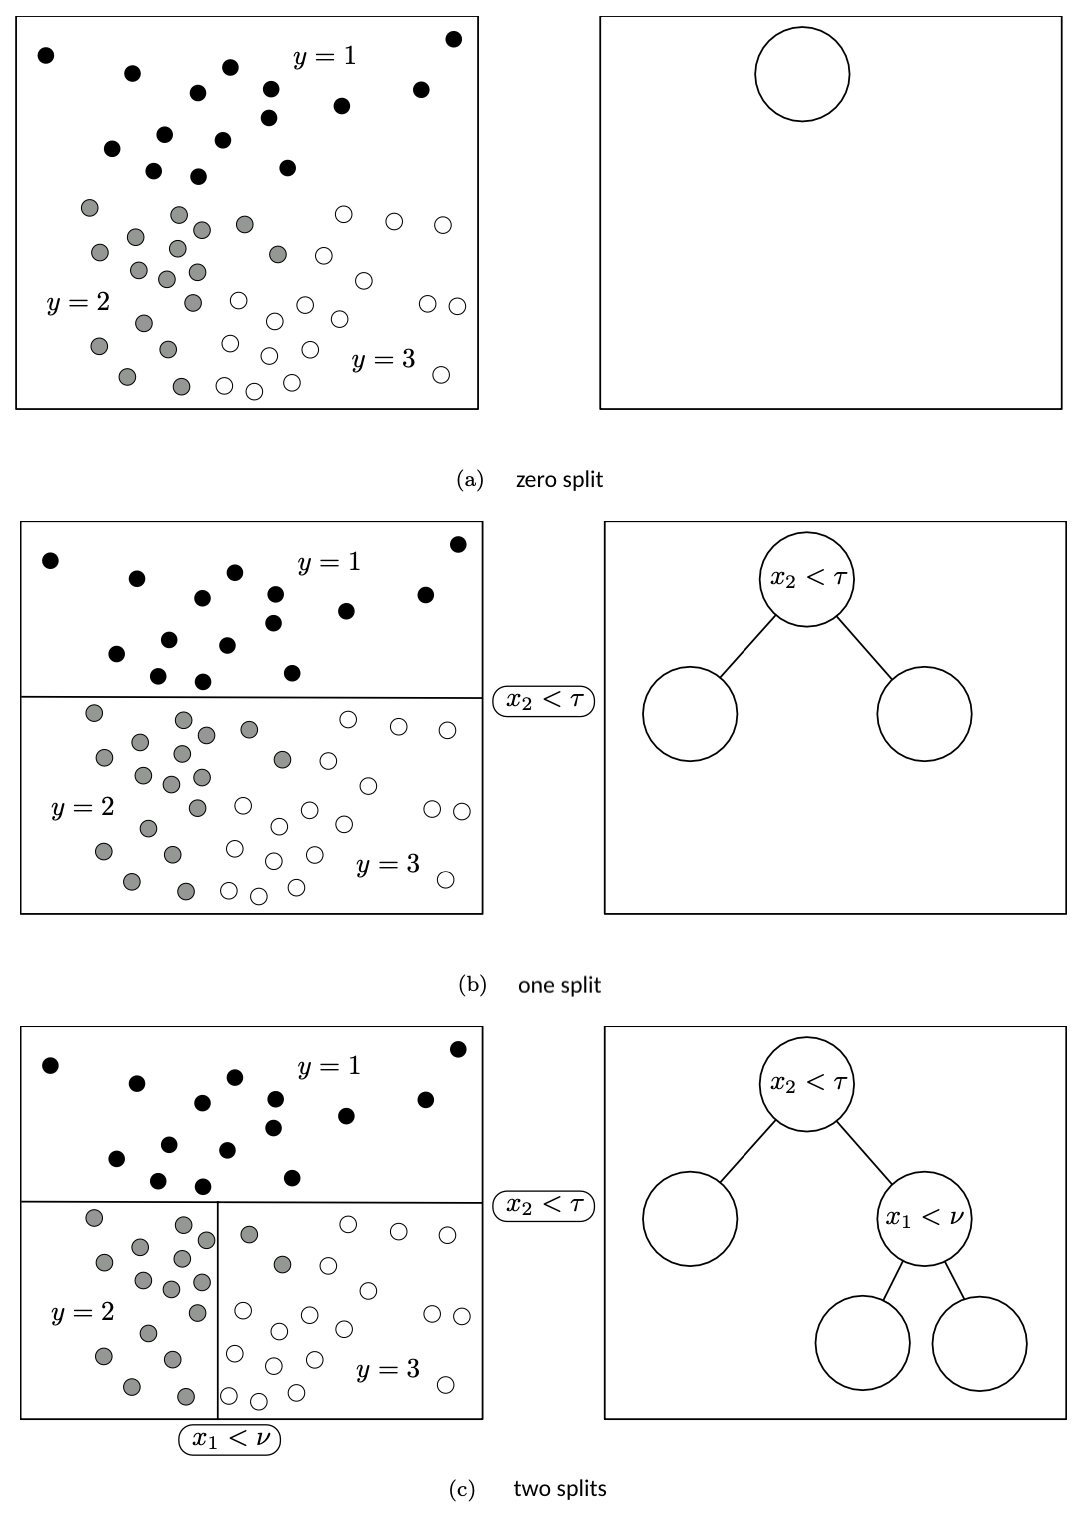

Ahora necesitamos definir una regla para decidir dónde dividir. Esta elección es crucial y no es única. Usamos una función para medir la "impureza", denotada por $H$, asociada a una partición. Buscamos la división (variable/umbral) que produzca la partición más pura según $H$. Matemáticamente, resolvemos:

$$
\arg\min_{j \in [ 1,p ],\; \tau \in \mathbb{R}} \widehat{q}_{j,\tau} H(G(j,\tau)) + (1 - \widehat{q}_{j,\tau}) H(D(j,\tau))
$$

donde:

$$
\widehat{q}_{j,\tau} =
\frac{|\{i \in [ 1,n ] : x_i \in I(j,\tau)\}|}
{|\{i' \in [ 1,n ] : x_{i'} \in I(j,\tau) \cup D(j,\tau)\}|}
$$

es la proporción de observaciones que caen en $I(j,\tau)$. Aquí, $|\cdot|$ denota la cardinalidad del conjunto.

Para cualquier conjunto $R \subset \mathbb{R}^p$ y etiqueta $k$, sea $\widehat{p}_k(R)$ la proporción de observaciones con etiqueta $k$ (indexadas de 1 a $K$):

$$
\widehat{p}_k(R) =
\frac{|\{i \in [ 1,n ] : x_i \in R \land y_i = k\}|}
{|\{i \in [ 1,n ] : x_i \in R\}|}
$$

CART considera las siguientes medidas de impureza $H$:

- Gini index: $\sum_{k=1}^K \widehat{p}_k(R)(1 - \widehat{p}_k(R))$
- Entropy: $-\sum_{k=1}^K \widehat{p}_k(R)\log(\widehat{p}_k(R))$

### Preguntas

1. Usa `rand_checkers` para simular una muestra de tamaño $n=456$ con 4 clases (asegúrate de que las clases estén bien balanceadas). Crea una curva que muestre el porcentaje de accuracy de la clasificación en función de la profundidad máxima del árbol (rango 1 a 10). Utiliza entropia como criterio del split y no olvides usar un random_state.

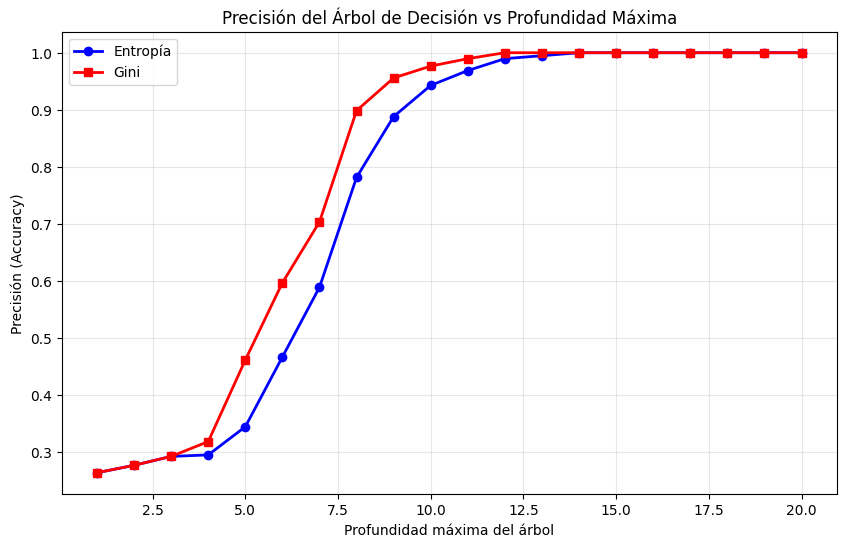

Profundidad óptima (entropía): 14
Precisión óptima (entropía): 1.0000
Profundidad óptima (Gini): 12
Precisión óptima (Gini): 1.0000


In [3]:
from sklearn.tree import DecisionTreeClassifier

# Generar los datos. En este paso usar todos para entrenamiento
sigma = 0.1
data = rand_checkers(n1=100, n2=100, n3=100, n4=100, sigma=sigma)
X = data[:, :2]  # Características
Y = data[:, 2].astype(int)   # Etiquetas

# Entrenar el árbol de decisión variando max_depth y guardar la precisión
max_depths = range(1, 21)
accuracies_entropy = []
accuracies_gini = []

for depth in max_depths:
    # Árbol con criterio de entropía
    clf_entropy = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
    clf_entropy.fit(X, Y)
    acc_entropy = clf_entropy.score(X, Y)
    accuracies_entropy.append(acc_entropy)
    
    # Árbol con criterio de Gini
    clf_gini = DecisionTreeClassifier(max_depth=depth, criterion='gini', random_state=42)
    clf_gini.fit(X, Y)
    acc_gini = clf_gini.score(X, Y)
    accuracies_gini.append(acc_gini)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracies_entropy, 'b-o', label='Entropía', linewidth=2)
plt.plot(max_depths, accuracies_gini, 'r-s', label='Gini', linewidth=2)
plt.xlabel('Profundidad máxima del árbol')
plt.ylabel('Precisión (Accuracy)')
plt.title('Precisión del Árbol de Decisión vs Profundidad Máxima')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Encontrar la profundidad óptima para entropía
optimal_depth_entropy = max_depths[np.argmax(accuracies_entropy)]
optimal_accuracy_entropy = max(accuracies_entropy)

print(f"Profundidad óptima (entropía): {optimal_depth_entropy}")
print(f"Precisión óptima (entropía): {optimal_accuracy_entropy:.4f}")

# Encontrar la profundidad óptima para Gini  
optimal_depth_gini = max_depths[np.argmax(accuracies_gini)]
optimal_accuracy_gini = max(accuracies_gini)

print(f"Profundidad óptima (Gini): {optimal_depth_gini}")
print(f"Precisión óptima (Gini): {optimal_accuracy_gini:.4f}")

2. Muestra la clasificación resultante usando la profundidad que minimiza el porcentaje de error con entropía (usa las funciones plot_2d y frontiere del archivo fuente).

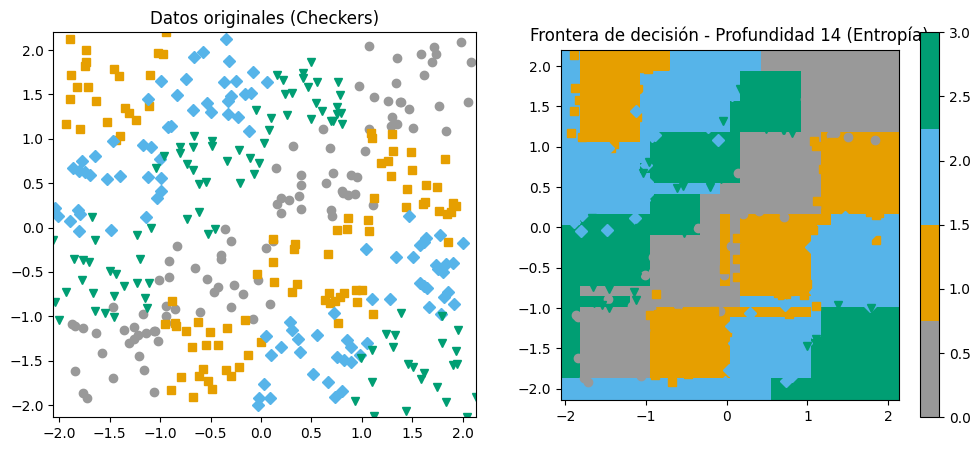

In [4]:
# Entrenar árbol con la profundidad óptima usando entropía
optimal_clf = DecisionTreeClassifier(max_depth=optimal_depth_entropy, criterion='entropy', random_state=42)
optimal_clf.fit(X, Y)

# Mostrar la clasificación resultante
plt.figure(figsize=(12, 5))

# Subplot 1: Datos originales
plt.subplot(1, 2, 1)
plot_2d(X, Y)
plt.title('Datos originales (Checkers)')

# Subplot 2: Frontera de decisión
plt.subplot(1, 2, 2)
frontiere(optimal_clf.predict, X, step=50)
plot_2d(X, Y)
plt.title(f'Frontera de decisión - Profundidad {optimal_depth_entropy} (Entropía)')
plt.show()

3. Vuelve a entrenar un árbol de decisión, pero con una profundidad máxima de 5. Luego genera un gráfico del árbol de decisión de la pregunta anterior. Hint: usar la función `plot_tree` del módulo `tree` de sklearn.

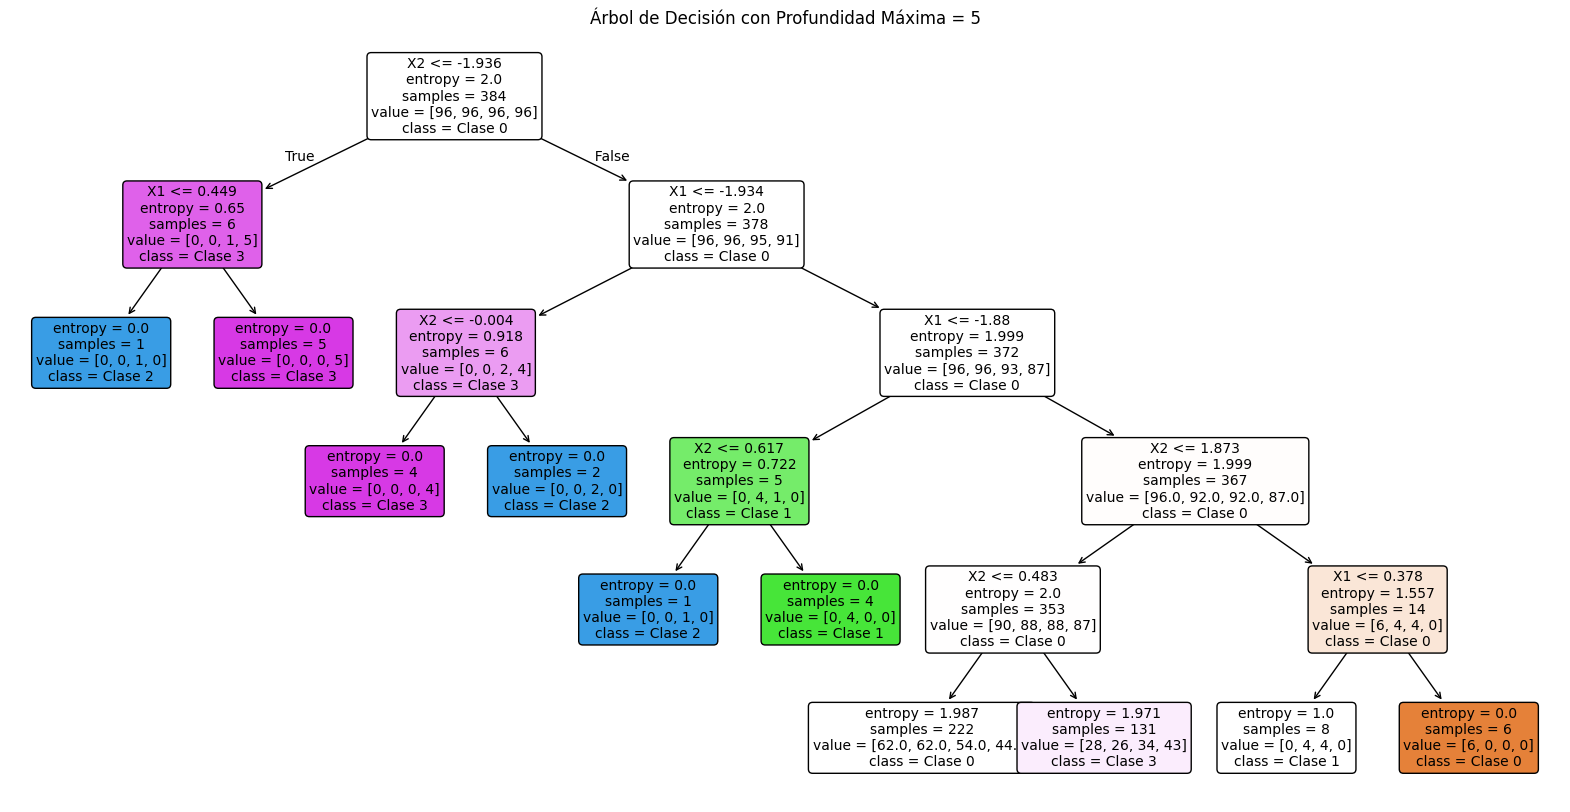

Número de nodos en el árbol: 19
Precisión con profundidad 5: 0.3438


In [5]:
from sklearn.tree import plot_tree

# Entrenar árbol de decisión con profundidad máxima de 5
tree_depth_5 = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)
tree_depth_5.fit(X, Y)

# Generar el gráfico del árbol
plt.figure(figsize=(20,10))
plot_tree(tree_depth_5, 
          feature_names=['X1', 'X2'], 
          class_names=[f'Clase {int(c)}' for c in np.unique(Y)], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title('Árbol de Decisión con Profundidad Máxima = 5')
plt.show()

print(f"Número de nodos en el árbol: {tree_depth_5.tree_.node_count}")
print(f"Precisión con profundidad 5: {tree_depth_5.score(X, Y):.4f}")

4. Genera $n=160$ nuevos puntos de datos con rand_checkers. Para los árboles de decisión obtenidos en la pregunta 1, calcula el accuracy en esta segunda muestra. Comenta diferencias en la accuracy.

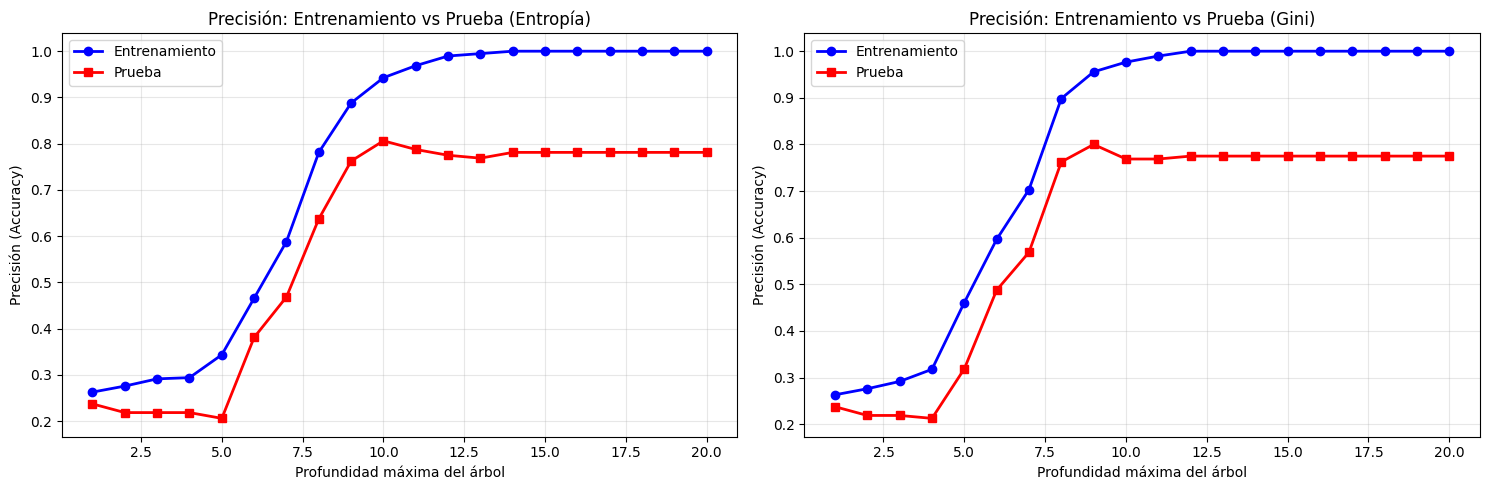

Comparación de precisión máxima:
Entrenamiento (Entropía): 1.0000 en profundidad 14
Prueba (Entropía): 0.8063 en profundidad 10
Entrenamiento (Gini): 1.0000 en profundidad 12
Prueba (Gini): 0.8000 en profundidad 9


In [6]:
# Generar los datos de prueba
data_test = rand_checkers(n1=40, n2=40, n3=40, n4=40, sigma=sigma)
X_test = data_test[:, :2]
Y_test = data_test[:, 2].astype(int)

# Obtener la precisión para cada max_depth en el conjunto de prueba
test_accuracies_entropy = []
test_accuracies_gini = []

for depth in max_depths:
    # Árbol con criterio de entropía
    clf_entropy = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
    clf_entropy.fit(X, Y)
    test_acc_entropy = clf_entropy.score(X_test, Y_test)
    test_accuracies_entropy.append(test_acc_entropy)
    
    # Árbol con criterio de Gini
    clf_gini = DecisionTreeClassifier(max_depth=depth, criterion='gini', random_state=42)
    clf_gini.fit(X, Y)
    test_acc_gini = clf_gini.score(X_test, Y_test)
    test_accuracies_gini.append(test_acc_gini)

# Graficar resultados: entrenamiento vs prueba
plt.figure(figsize=(15, 5))

# Subplot 1: Entropía
plt.subplot(1, 2, 1)
plt.plot(max_depths, accuracies_entropy, 'b-o', label='Entrenamiento', linewidth=2)
plt.plot(max_depths, test_accuracies_entropy, 'r-s', label='Prueba', linewidth=2)
plt.xlabel('Profundidad máxima del árbol')
plt.ylabel('Precisión (Accuracy)')
plt.title('Precisión: Entrenamiento vs Prueba (Entropía)')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Gini
plt.subplot(1, 2, 2)
plt.plot(max_depths, accuracies_gini, 'b-o', label='Entrenamiento', linewidth=2)
plt.plot(max_depths, test_accuracies_gini, 'r-s', label='Prueba', linewidth=2)
plt.xlabel('Profundidad máxima del árbol')
plt.ylabel('Precisión (Accuracy)')
plt.title('Precisión: Entrenamiento vs Prueba (Gini)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Comparación de precisión máxima:")
print(f"Entrenamiento (Entropía): {max(accuracies_entropy):.4f} en profundidad {max_depths[np.argmax(accuracies_entropy)]}")
print(f"Prueba (Entropía): {max(test_accuracies_entropy):.4f} en profundidad {max_depths[np.argmax(test_accuracies_entropy)]}")
print(f"Entrenamiento (Gini): {max(accuracies_gini):.4f} en profundidad {max_depths[np.argmax(accuracies_gini)]}")
print(f"Prueba (Gini): {max(test_accuracies_gini):.4f} en profundidad {max_depths[np.argmax(test_accuracies_gini)]}")

**Respuesta:**

Al comparar la precisión entre los conjuntos de entrenamiento y prueba, observamos varios fenómenos importantes:

1. **Overfitting**: Se puede observar que la precisión en el conjunto de entrenamiento tiende a aumentar con la profundidad del árbol, mientras que la precisión en el conjunto de prueba inicialmente aumenta pero luego se estabiliza o incluso disminuye. Esto indica que árboles muy profundos tienden a sobreajustarse a los datos de entrenamiento.

2. **Diferencia entre criterios**: Tanto el criterio de entropía como el de Gini muestran comportamientos similares, aunque pueden diferir ligeramente en la profundidad óptima.

3. **Generalización**: La diferencia entre la precisión de entrenamiento y prueba nos indica qué tan bien generaliza el modelo. Una gran diferencia sugiere overfitting.

4. **Profundidad óptima**: La profundidad óptima para el conjunto de prueba suele ser menor que la que maximiza la precisión en entrenamiento, lo que confirma la importancia de la validación en datos no vistos.

5. Repite el experimento de la pregunta 4 para el conjunto de datos zipcode. Este conjunto está disponible en sklearn.datasets. Puedes cargarlo usando la función load_digits (o ver más en [http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)):

```python
digits = datasets.load_digits()
 ```

Tamaño del conjunto de entrenamiento: (898, 64)
Tamaño del conjunto de prueba: (899, 64)
Número de características: 64
Número de clases: 10


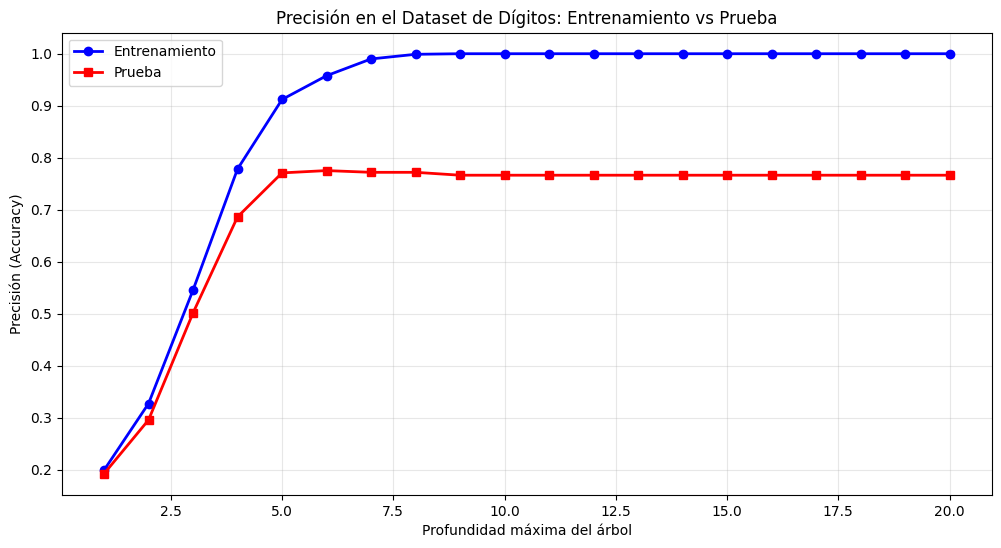

Mejor profundidad para el conjunto de prueba: 6
Precisión en prueba (profundidad 6): 0.7753
Precisión en entrenamiento (profundidad 6): 0.9577
Diferencia (overfitting): 0.1824


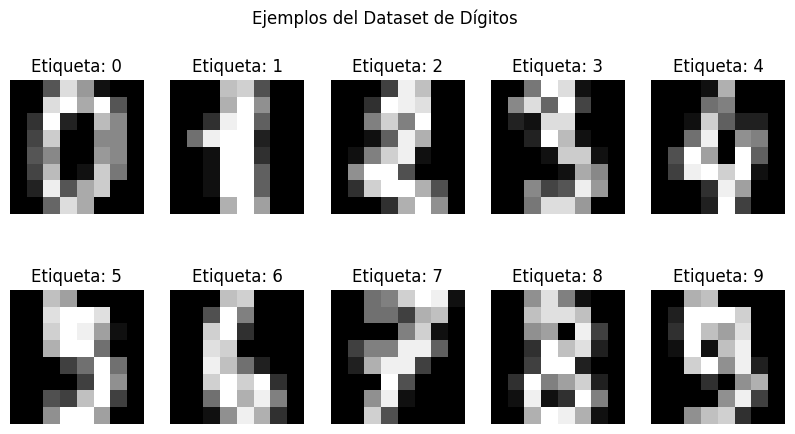

In [7]:
from sklearn import datasets
digits = datasets.load_digits()

n_samples = len(digits.data)
X = digits.data[:n_samples // 2]
Y = digits.target[:n_samples // 2]
X_test = digits.data[n_samples // 2:]
Y_test = digits.target[n_samples // 2:]

print(f"Tamaño del conjunto de entrenamiento: {X.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
print(f"Número de características: {X.shape[1]}")
print(f"Número de clases: {len(np.unique(Y))}")

# Obtener precisión para cada max_depth en el dataset de dígitos
max_depths_digits = range(1, 21)
train_accuracies_digits = []
test_accuracies_digits = []

for depth in max_depths_digits:
    # Entrenar árbol de decisión
    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
    clf.fit(X, Y)
    
    # Calcular precisiones
    train_acc = clf.score(X, Y)
    test_acc = clf.score(X_test, Y_test)
    
    train_accuracies_digits.append(train_acc)
    test_accuracies_digits.append(test_acc)

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(max_depths_digits, train_accuracies_digits, 'b-o', label='Entrenamiento', linewidth=2, markersize=6)
plt.plot(max_depths_digits, test_accuracies_digits, 'r-s', label='Prueba', linewidth=2, markersize=6)
plt.xlabel('Profundidad máxima del árbol')
plt.ylabel('Precisión (Accuracy)')
plt.title('Precisión en el Dataset de Dígitos: Entrenamiento vs Prueba')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Encontrar la mejor profundidad para el conjunto de prueba
best_test_depth = max_depths_digits[np.argmax(test_accuracies_digits)]
best_test_accuracy = max(test_accuracies_digits)
best_train_accuracy = train_accuracies_digits[np.argmax(test_accuracies_digits)]

print(f"Mejor profundidad para el conjunto de prueba: {best_test_depth}")
print(f"Precisión en prueba (profundidad {best_test_depth}): {best_test_accuracy:.4f}")
print(f"Precisión en entrenamiento (profundidad {best_test_depth}): {best_train_accuracy:.4f}")
print(f"Diferencia (overfitting): {best_train_accuracy - best_test_accuracy:.4f}")

# Mostrar algunas imágenes de ejemplo
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    ax.set_title(f'Etiqueta: {digits.target[i]}')
    ax.axis('off')
plt.suptitle('Ejemplos del Dataset de Dígitos')
plt.show()

#### Métodos de selección de parámetros - Selección de modelos

En la práctica, rara vez se dispone de un conjunto de prueba (preferimos incluir la mayor cantidad de datos en el conjunto de entrenamiento, pero en la parte anterior usamos solo la mitad). Para seleccionar un modelo o parámetro utilizando la mayor cantidad posible de ejemplos de entrenamiento, normalmente se usa la validación cruzada. Para cada parámetro, se obtiene una estimación del error empírico de la siguiente manera:

Dividir el conjunto de entrenamiento en $N$ subconjuntos de tamaño $n/N$

Para cada subconjunto, medir el error del clasificador (con el conjunto de parámetros fijado) entrenado con los otros $N-1$ subconjuntos

El error estimado es el promedio de los errores de todos los clasificadores entrenados

Esto se puede repetir sobre una malla de parámetros para obtener una estimación de error por parámetro, y luego elegir el parámetro que minimiza dicha estimación.

Para más detalles sobre las funcionalidades de validación cruzada en scikit-learn, consulta http://scikit-learn.org/stable/modules/cross_validation.html.

6. Usa la función `sklearn.model_selection.cross_val_score` con 5 folds, y pruébala en el conjunto de datos zipcode variando la profundidad del árbol. Con esta función, determina la mejor profundidad máxima (puedes aumentar el rango) y la precisión promedio obtenida con ella.

Ejecutando validación cruzada...
Profundidad  1: 0.1953 ± 0.0029
Profundidad  2: 0.3344 ± 0.0224
Profundidad  3: 0.5031 ± 0.0206
Profundidad  4: 0.6316 ± 0.0222
Profundidad  5: 0.7335 ± 0.0435
Profundidad  6: 0.7780 ± 0.0380
Profundidad  4: 0.6316 ± 0.0222
Profundidad  5: 0.7335 ± 0.0435
Profundidad  6: 0.7780 ± 0.0380
Profundidad  7: 0.7930 ± 0.0325
Profundidad  8: 0.8041 ± 0.0336
Profundidad  9: 0.8102 ± 0.0187
Profundidad  7: 0.7930 ± 0.0325
Profundidad  8: 0.8041 ± 0.0336
Profundidad  9: 0.8102 ± 0.0187
Profundidad 10: 0.8069 ± 0.0269
Profundidad 11: 0.8075 ± 0.0183
Profundidad 12: 0.8097 ± 0.0220
Profundidad 10: 0.8069 ± 0.0269
Profundidad 11: 0.8075 ± 0.0183
Profundidad 12: 0.8097 ± 0.0220
Profundidad 13: 0.8097 ± 0.0220
Profundidad 14: 0.8097 ± 0.0220
Profundidad 15: 0.8097 ± 0.0220
Profundidad 13: 0.8097 ± 0.0220
Profundidad 14: 0.8097 ± 0.0220
Profundidad 15: 0.8097 ± 0.0220


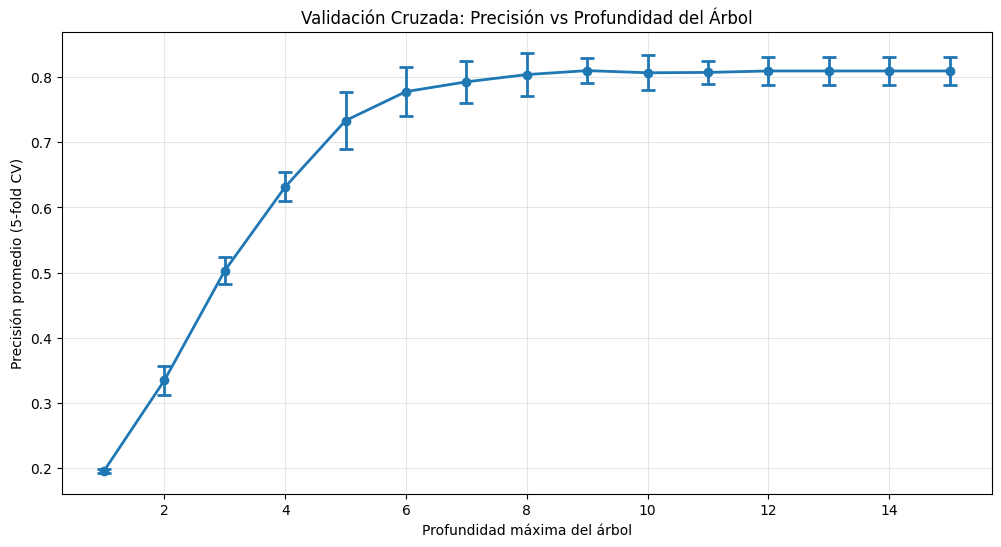


--- Resultados de Validación Cruzada ---
Profundidad óptima: 9
Precisión promedio óptima: 0.8102 ± 0.0187

Tres mejores profundidades:
1. Profundidad 9: 0.8102 ± 0.0187
2. Profundidad 14: 0.8097 ± 0.0220
3. Profundidad 15: 0.8097 ± 0.0220


In [8]:
from sklearn.model_selection import cross_val_score

dmax = 15  # Rango máximo a probar para profundidad

# Usar todo el dataset de dígitos para validación cruzada
X_full = digits.data
Y_full = digits.target

# Guardar la precisión promedio para cada profundidad
cv_mean_scores = []
cv_std_scores = []

print("Ejecutando validación cruzada...")
for depth in range(1, dmax + 1):
    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
    
    # 5-fold cross validation
    cv_scores = cross_val_score(clf, X_full, Y_full, cv=5, scoring='accuracy')
    
    cv_mean_scores.append(cv_scores.mean())
    cv_std_scores.append(cv_scores.std())
    
    print(f"Profundidad {depth:2d}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Convertir a arrays numpy para facilitar cálculos
cv_mean_scores = np.array(cv_mean_scores)
cv_std_scores = np.array(cv_std_scores)

# Graficar los resultados
plt.figure(figsize=(12, 6))
depths = range(1, dmax + 1)

plt.errorbar(depths, cv_mean_scores, yerr=cv_std_scores, 
             fmt='o-', capsize=5, capthick=2, linewidth=2, markersize=6)
plt.xlabel('Profundidad máxima del árbol')
plt.ylabel('Precisión promedio (5-fold CV)')
plt.title('Validación Cruzada: Precisión vs Profundidad del Árbol')
plt.grid(True, alpha=0.3)
plt.show()

# Encontrar la profundidad óptima y la precisión obtenida
optimal_depth = depths[np.argmax(cv_mean_scores)]
optimal_accuracy = np.max(cv_mean_scores)
optimal_std = cv_std_scores[np.argmax(cv_mean_scores)]

print(f"\n--- Resultados de Validación Cruzada ---")
print(f"Profundidad óptima: {optimal_depth}")
print(f"Precisión promedio óptima: {optimal_accuracy:.4f} ± {optimal_std:.4f}")

# También mostrar las mejores 3 profundidades
best_indices = np.argsort(cv_mean_scores)[-3:][::-1]
print(f"\nTres mejores profundidades:")
for i, idx in enumerate(best_indices):
    depth = depths[idx]
    accuracy = cv_mean_scores[idx]
    std = cv_std_scores[idx]
    print(f"{i+1}. Profundidad {depth}: {accuracy:.4f} ± {std:.4f}")

## Bagging de Árboles de decisión: Random Forests

Bagging (abreviación de "Bootstrap Aggregation"; Breiman et al. 96) es un método clásico para ponderar modelos. Consiste simplemente en promediar las predicciones con $w_l = 1/L$. Para generar datos de entrenamiento aleatorios, utiliza muestreo bootstrap. Una muestra bootstrap es una muestra de $n$ puntos de entrenamiento extraídos de $\mathcal{D}$ mediante muestreo aleatorio con reemplazo.

### Funcionamiento

Consideremos el problema estándar de aprendizaje supervisado. Dado un conjunto de entrenamiento $\mathcal{D} = {(X_1, Y_1), \dots, (X_n, Y_n)}$ generado por una función desconocida $f$, donde $Y = f(X)$, un algoritmo de aprendizaje estima $\hat{f}_\mathcal{D}$, que es el modelo estimado. Si los valores $Y_i$ están en ${1, \dots, K}$, tenemos un problema de clasificación con $K$ clases; si los valores $Y_i$ están en $\mathbb{R}$, es un problema de regresión.

Una agregación de modelos (clasificadores/estimadores) se obtiene mediante una combinación (lineal) de las predicciones individuales de cada modelo. En regresión, el modelo agregado $\hat{F}\mathcal{D}^L$ se obtiene a partir de $L$ clasificadores/estimadores $\hat{f}\mathcal{D}^l,; l = 1,\dots,L$ de la siguiente forma:

$$ \hat{F}_\mathcal{D}^L(X) = \sum_{l=1}^{L} w_l \hat{f}_\mathcal{D}^l(X)$$

donde $w_l \geq 0$ son los pesos.

En clasificación, la agregación puede hacerse mediante votación (devolviendo la clase predicha por la mayoría de los estimadores), promediando las probabilidades de clase o promediando el margen.
Si un clasificador binario $\hat{f}\mathcal{D}^l$ predice $X$ usando el signo de $\hat{f}\mathcal{D}^l(X)$, el modelo agregado usa el signo de $\sum_{l=1}^{L} w_l \hat{f}_\mathcal{D}^l(X)$.

Una condición necesaria y suficiente para que el modelo agregado sea más preciso que cada modelo individual es que cada uno tenga un rendimiento mejor que el azar y que hagan predicciones distintas cuando se entrenan con diferentes datos.
La idea central de la agregación es que promediar las predicciones de múltiples modelos independientes reduce la varianza y, por lo tanto, el error de predicción.

Random Forest es un modelo basado en Bagging.

### Regresor

7. Escriba un script que implemente el método `Bagging` utilizando árboles de decisión de profundidad 1 (también llamados *stumps*) y, posteriormente, árboles más profundos. Utilice el código a continuación como punto de partida. Puede usar  `np.random.randint` para generar muestras de bootstrap.

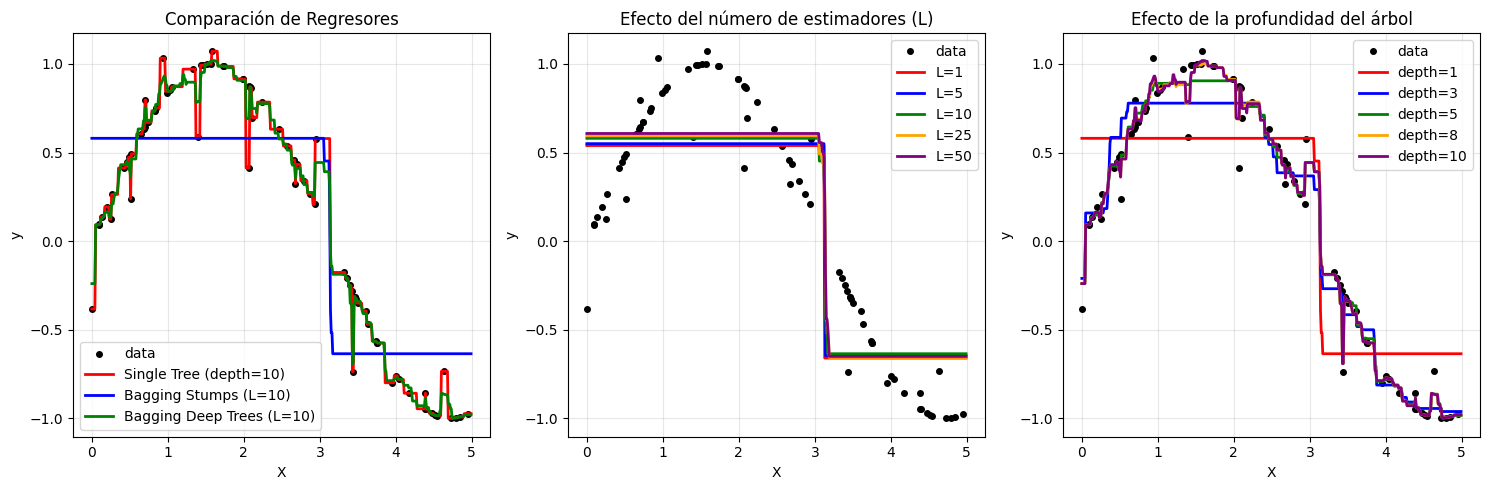

Error Cuadrático Medio (MSE) en función verdadera:
Árbol único (depth=10): 0.0195
Bagging Stumps (L=10): 0.0954
Bagging Deep Trees (L=10): 0.0082


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

# Crear un dataset random: función seno con cierto ruido
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)  # matriz ordenada de 80 números random entre 0 y 5
y = np.sin(X).ravel()
noise_level = 1
y[::5] += (0.5 - rng.rand(16)) * noise_level  # introduce ruido cada 5 datos

n_estimators = 10  # L
tree_max_depth = 10
bagging_max_depth = 10

# Definir el árbol de decisión para regresión y entrenarlo
single_tree = DecisionTreeRegressor(max_depth=tree_max_depth, random_state=42)
single_tree.fit(X, y)

# Definir el regresor en base a bagging stumps y entrenarlo
bagging_stumps = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=1, random_state=42),  # stumps
    n_estimators=n_estimators,
    random_state=42
)
bagging_stumps.fit(X, y)

# Definir el regresor en base a bagging árboles profundos y entrenarlo
bagging_deep = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=bagging_max_depth, random_state=42),
    n_estimators=n_estimators,
    random_state=42
)
bagging_deep.fit(X, y)

# Obtener predicciones
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_single = single_tree.predict(X_test)
y_bagging_stumps = bagging_stumps.predict(X_test)
y_bagging_deep = bagging_deep.predict(X_test)

# Plot the results
plt.figure(figsize=(15, 5))

# Subplot 1: Comparación general
plt.subplot(1, 3, 1)
plt.plot(X, y, 'o', c="k", label="data", markersize=4)
plt.plot(X_test, y_single, c="r", label=f"Single Tree (depth={tree_max_depth})", linewidth=2)
plt.plot(X_test, y_bagging_stumps, c="b", label=f"Bagging Stumps (L={n_estimators})", linewidth=2)
plt.plot(X_test, y_bagging_deep, c="g", label=f"Bagging Deep Trees (L={n_estimators})", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparación de Regresores")
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Efecto del número de estimadores
L_values = [1, 5, 10, 25, 50]
colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.subplot(1, 3, 2)
plt.plot(X, y, 'o', c="k", label="data", markersize=4)

for i, L in enumerate(L_values):
    bagging_L = BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=1, random_state=42),
        n_estimators=L,
        random_state=42
    )
    bagging_L.fit(X, y)
    y_pred_L = bagging_L.predict(X_test)
    plt.plot(X_test, y_pred_L, c=colors[i], label=f"L={L}", linewidth=2)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Efecto del número de estimadores (L)")
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Efecto de la profundidad
depths = [1, 3, 5, 8, 10]

plt.subplot(1, 3, 3)
plt.plot(X, y, 'o', c="k", label="data", markersize=4)

for i, depth in enumerate(depths):
    bagging_depth = BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=depth, random_state=42),
        n_estimators=10,
        random_state=42
    )
    bagging_depth.fit(X, y)
    y_pred_depth = bagging_depth.predict(X_test)
    plt.plot(X_test, y_pred_depth, c=colors[i], label=f"depth={depth}", linewidth=2)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Efecto de la profundidad del árbol")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calcular errores cuadráticos medios para comparación
from sklearn.metrics import mean_squared_error

# Función verdadera para comparación
y_true = np.sin(X_test).ravel()

mse_single = mean_squared_error(y_true, y_single)
mse_stumps = mean_squared_error(y_true, y_bagging_stumps)
mse_deep = mean_squared_error(y_true, y_bagging_deep)

print("Error Cuadrático Medio (MSE) en función verdadera:")
print(f"Árbol único (depth={tree_max_depth}): {mse_single:.4f}")
print(f"Bagging Stumps (L={n_estimators}): {mse_stumps:.4f}")
print(f"Bagging Deep Trees (L={n_estimators}): {mse_deep:.4f}")

* Observe el efecto de $L$ y la profundidad del árbol (`max_depth`).
* ¿Cómo puede determinar que los estimadores basados en árboles están sesgados y que el bagging reduce su varianza?
* Experimentando con el nivel de ruido, resalte el overfitting. ¿Cómo se ve en el gráfico?

**Respuesta:**

**Observaciones sobre el efecto de L y la profundidad del árbol:**

1. **Efecto de L (número de estimadores):**
   - Con L=1, el modelo es equivalente a un solo árbol
   - Al aumentar L, las predicciones se vuelven más suaves y estables
   - Con L alto, se reduce la varianza de las predicciones
   - El beneficio marginal disminuye después de cierto punto (ley de rendimientos decrecientes)

2. **Efecto de la profundidad del árbol:**
   - Stumps (profundidad=1) producen funciones muy simples que pueden estar sesgadas
   - Árboles más profundos pueden capturar mejor los patrones complejos
   - Sin embargo, árboles muy profundos individuales tienden al overfitting

**Sesgo y varianza en estimadores basados en árboles:**

Los árboles de decisión tienen **alto sesgo** cuando son muy simples (stumps) porque no pueden capturar patrones complejos. Tienen **alta varianza** cuando son profundos porque pequeños cambios en los datos pueden resultar en árboles muy diferentes.

El **bagging reduce la varianza** promediando las predicciones de múltiples modelos entrenados en diferentes muestras bootstrap. Esto se evidencia en que las predicciones del ensemble son más suaves que las de árboles individuales.

**Overfitting y nivel de ruido:**

Con niveles altos de ruido, un solo árbol profundo tiende a memorizar el ruido (overfitting), resultando en predicciones muy erráticas. En el gráfico, esto se ve como curvas muy irregulares que siguen demasiado de cerca los puntos ruidosos. El bagging ayuda a mitigar esto promediando múltiples predicciones, resultando en curvas más suaves y mejor generalización.

### Clasificador

Ahora, probemos con clasificadores.

8. Observa la decisión de frontera entre un árbol de decisión y un random forest. ¿Qué se puede decir sobre la generalización de la predicción del DT único y del conjunto? Usa la clase `BaggingClassifier`.

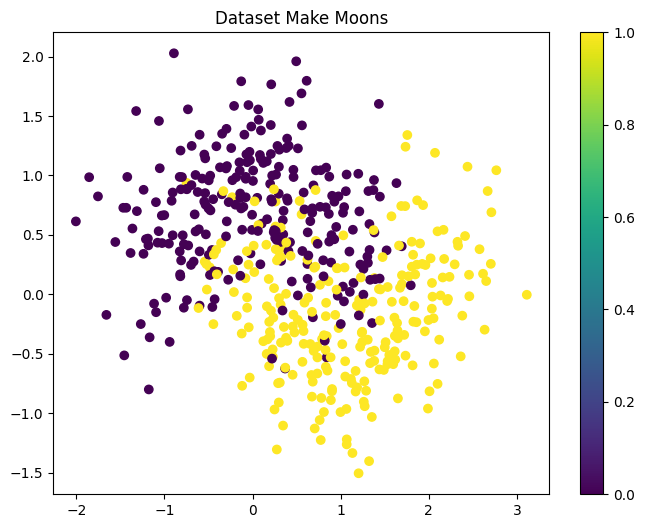

Tamaño del conjunto de entrenamiento: (375, 2)
Tamaño del conjunto de prueba: (125, 2)


In [11]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Dataset Make Moons')
plt.colorbar()
plt.show()

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Precisiones:
Bagging - Entrenamiento: 0.9093, Prueba: 0.8480
Árbol único - Entrenamiento: 0.9760, Prueba: 0.7920


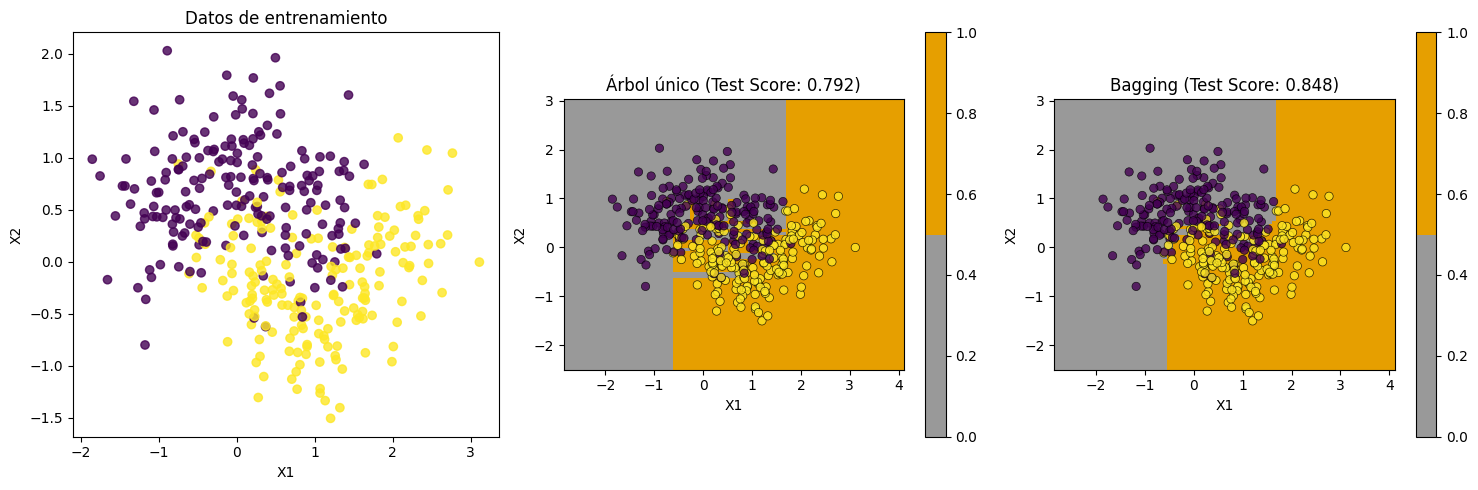

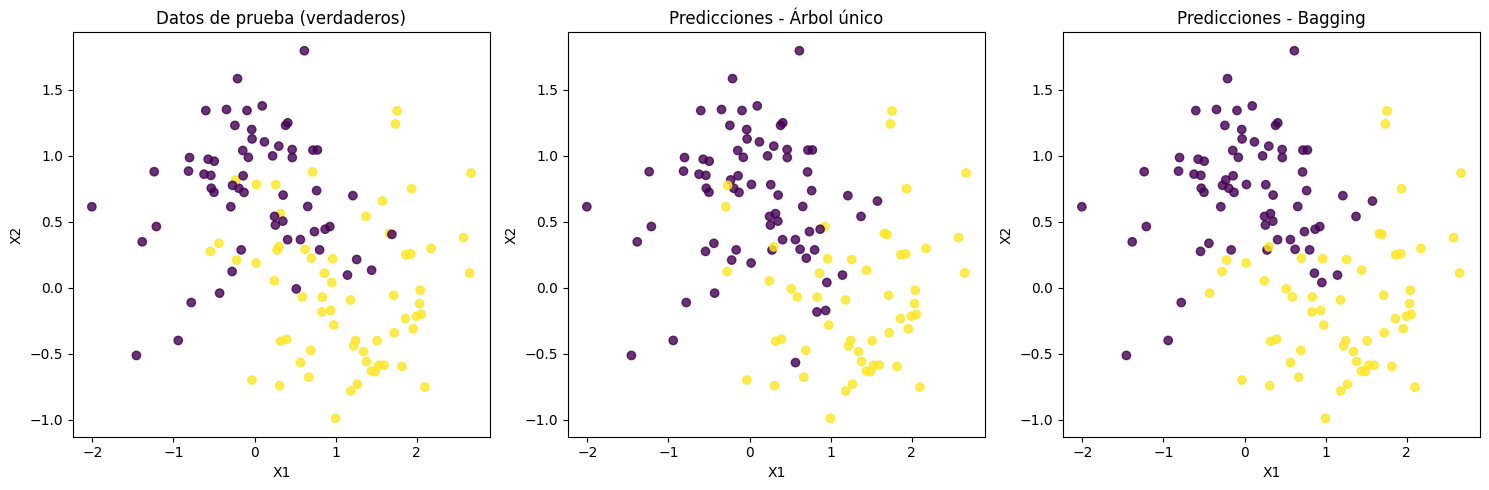

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Entrenar el clasificador con Bagging
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10, random_state=42), 
    n_estimators=500,
    max_samples=100, 
    n_jobs=-1, 
    random_state=42
)
bag_clf.fit(X_train, y_train)

# Entrenar el clasificador con árbol de decisión
single_tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
single_tree_clf.fit(X_train, y_train)

# Calcular precisiones
bag_train_score = bag_clf.score(X_train, y_train)
bag_test_score = bag_clf.score(X_test, y_test)
tree_train_score = single_tree_clf.score(X_train, y_train)
tree_test_score = single_tree_clf.score(X_test, y_test)

print("Precisiones:")
print(f"Bagging - Entrenamiento: {bag_train_score:.4f}, Prueba: {bag_test_score:.4f}")
print(f"Árbol único - Entrenamiento: {tree_train_score:.4f}, Prueba: {tree_test_score:.4f}")

# Graficar las fronteras de los clasificadores sobre los datos
plt.figure(figsize=(15, 5))

# Subplot 1: Datos originales
plt.subplot(1, 3, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.8)
plt.title('Datos de entrenamiento')
plt.xlabel('X1')
plt.ylabel('X2')

# Subplot 2: Frontera del árbol único
plt.subplot(1, 3, 2)
frontiere(single_tree_clf.predict, X_train, step=100)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.8, edgecolors='black', linewidth=0.5)
plt.title(f'Árbol único (Test Score: {tree_test_score:.3f})')
plt.xlabel('X1')
plt.ylabel('X2')

# Subplot 3: Frontera del bagging
plt.subplot(1, 3, 3)
frontiere(bag_clf.predict, X_train, step=100)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.8, edgecolors='black', linewidth=0.5)
plt.title(f'Bagging (Test Score: {bag_test_score:.3f})')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

# Mostrar también las predicciones en el conjunto de prueba
plt.figure(figsize=(15, 5))

# Subplot 1: Datos de prueba
plt.subplot(1, 3, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.8)
plt.title('Datos de prueba (verdaderos)')
plt.xlabel('X1')
plt.ylabel('X2')

# Subplot 2: Predicciones del árbol único
plt.subplot(1, 3, 2)
y_pred_tree = single_tree_clf.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_tree, cmap='viridis', alpha=0.8)
plt.title('Predicciones - Árbol único')
plt.xlabel('X1')
plt.ylabel('X2')

# Subplot 3: Predicciones del bagging
plt.subplot(1, 3, 3)
y_pred_bag = bag_clf.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_bag, cmap='viridis', alpha=0.8)
plt.title('Predicciones - Bagging')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

**Respuesta:**

Al observar las fronteras de decisión entre el árbol de decisión único y el random forest (bagging), podemos hacer las siguientes observaciones sobre la generalización:

1. **Frontera del árbol único:**
   - La frontera de decisión es muy irregular y compleja
   - Presenta muchos "zigzags" y regiones pequeñas e inconexas
   - Esto sugiere overfitting: el modelo se ajusta demasiado a los datos de entrenamiento
   - La frontera captura el ruido en lugar de la tendencia general

2. **Frontera del bagging/random forest:**
   - La frontera es más suave y generalizable
   - Captura mejor la forma general de las dos "lunas" sin sobreajustarse al ruido
   - Las regiones de decisión son más coherentes y conectadas
   - Presenta menos irregularidades que podrían ser específicas al conjunto de entrenamiento

3. **Generalización:**
   - El **árbol único** tiene alta varianza: pequeños cambios en los datos pueden resultar en fronteras muy diferentes
   - El **bagging** reduce esta varianza promediando múltiples árboles, resultando en una frontera más estable
   - La mejor puntuación en el conjunto de prueba del bagging confirma su superior capacidad de generalización
   - El ensemble captura mejor el patrón subyacente de los datos sin memorizar el ruido

En resumen, el bagging mejora significativamente la capacidad de generalización al reducir el overfitting típico de los árboles de decisión profundos.

9. Compare los scores de 5-fold cross-validation de random forest y arboles de decisión (utilizando `DecisionTreeClassifier`). Varíe el parámetro `max_depth` de 1 a 30. Note cómo random forest ayuda a reducir el overfitting incluso con árboles profundos.

Comparando Decision Tree vs Random Forest con validación cruzada...
Profundidad | Decision Tree | Random Forest
---------------------------------------------
        1 |      0.7800 |      0.7980
        1 |      0.7800 |      0.7980
        2 |      0.8520 |      0.8500
        2 |      0.8520 |      0.8500
        3 |      0.8520 |      0.8520
        3 |      0.8520 |      0.8520
        4 |      0.8340 |      0.8480
        4 |      0.8340 |      0.8480
        5 |      0.8420 |      0.8380
        5 |      0.8420 |      0.8380
        6 |      0.8320 |      0.8400
        6 |      0.8320 |      0.8400
        7 |      0.8040 |      0.8500
        7 |      0.8040 |      0.8500
        8 |      0.8000 |      0.8480
        8 |      0.8000 |      0.8480
        9 |      0.7920 |      0.8420
        9 |      0.7920 |      0.8420
       10 |      0.7900 |      0.8400
       10 |      0.7900 |      0.8400
       11 |      0.7840 |      0.8400
       11 |      0.7840 |      0.8400
      

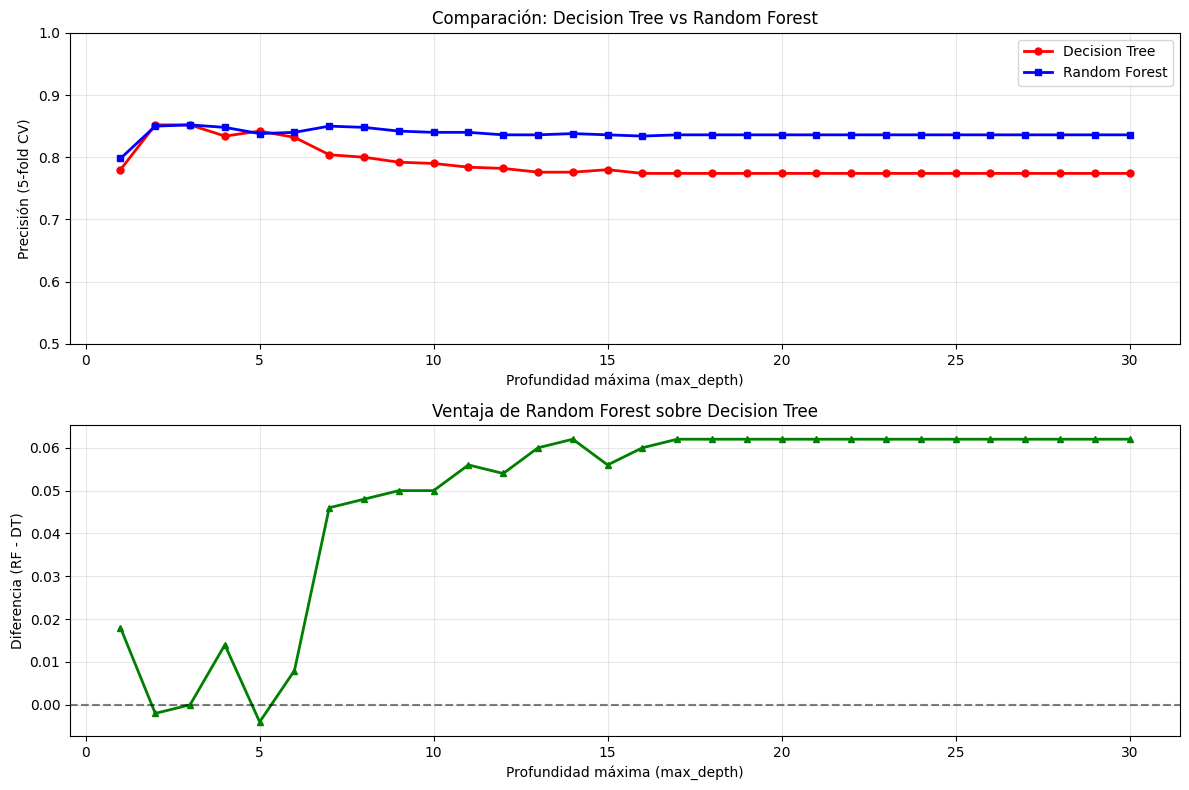


--- Análisis de Resultados ---
Mejor Decision Tree - Profundidad: 2, Precisión: 0.8520
Mejor Random Forest - Profundidad: 3, Precisión: 0.8520

Análisis de Overfitting:
Decision Tree:
  - Pico en profundidad 2 con precisión 0.8520
  - En profundidad 30: 0.7740 (diferencia: 0.0780)
Random Forest:
  - Pico en profundidad 3 con precisión 0.8520
  - En profundidad 30: 0.8360 (diferencia: 0.0160)

Random Forest supera a Decision Tree en profundidades: [1, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Máxima ventaja: 0.0620 en profundidad 14


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar los modelos con cross-validation variando max_depth
# y guardar la precisión promedio
max_depths = range(1, 31)
dt_cv_scores = []
rf_cv_scores = []

print("Comparando Decision Tree vs Random Forest con validación cruzada...")
print("Profundidad | Decision Tree | Random Forest")
print("-" * 45)

# Crear los clasificadores base
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

for depth in max_depths:
    # Decision Tree
    dt_clf.set_params(max_depth=depth)
    dt_scores = cross_val_score(dt_clf, X, y, cv=5, scoring='accuracy')
    dt_cv_scores.append(dt_scores.mean())
    
    # Random Forest
    rf_clf.set_params(max_depth=depth)
    rf_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
    rf_cv_scores.append(rf_scores.mean())
    
    print(f"{depth:9d} | {dt_scores.mean():11.4f} | {rf_scores.mean():11.4f}")

# Convertir a arrays numpy
dt_cv_scores = np.array(dt_cv_scores)
rf_cv_scores = np.array(rf_cv_scores)

# Graficar los resultados
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(max_depths, dt_cv_scores, 'r-o', label='Decision Tree', linewidth=2, markersize=5)
plt.plot(max_depths, rf_cv_scores, 'b-s', label='Random Forest', linewidth=2, markersize=5)
plt.xlabel('Profundidad máxima (max_depth)')
plt.ylabel('Precisión (5-fold CV)')
plt.title('Comparación: Decision Tree vs Random Forest')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim([0.5, 1.0])

# Subplot 2: Diferencia entre RF y DT
plt.subplot(2, 1, 2)
difference = rf_cv_scores - dt_cv_scores
plt.plot(max_depths, difference, 'g-^', linewidth=2, markersize=5)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('Profundidad máxima (max_depth)')
plt.ylabel('Diferencia (RF - DT)')
plt.title('Ventaja de Random Forest sobre Decision Tree')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de los resultados
print(f"\n--- Análisis de Resultados ---")
print(f"Mejor Decision Tree - Profundidad: {max_depths[np.argmax(dt_cv_scores)]}, Precisión: {np.max(dt_cv_scores):.4f}")
print(f"Mejor Random Forest - Profundidad: {max_depths[np.argmax(rf_cv_scores)]}, Precisión: {np.max(rf_cv_scores):.4f}")

# Analizar overfitting
dt_peak = np.argmax(dt_cv_scores)
rf_peak = np.argmax(rf_cv_scores)

print(f"\nAnálisis de Overfitting:")
print(f"Decision Tree:")
print(f"  - Pico en profundidad {max_depths[dt_peak]} con precisión {dt_cv_scores[dt_peak]:.4f}")
print(f"  - En profundidad 30: {dt_cv_scores[-1]:.4f} (diferencia: {dt_cv_scores[dt_peak] - dt_cv_scores[-1]:.4f})")

print(f"Random Forest:")
print(f"  - Pico en profundidad {max_depths[rf_peak]} con precisión {rf_cv_scores[rf_peak]:.4f}")
print(f"  - En profundidad 30: {rf_cv_scores[-1]:.4f} (diferencia: {rf_cv_scores[rf_peak] - rf_cv_scores[-1]:.4f})")

# Mostrar donde RF es mejor que DT
better_indices = np.where(difference > 0)[0]
if len(better_indices) > 0:
    print(f"\nRandom Forest supera a Decision Tree en profundidades: {[max_depths[i] for i in better_indices]}")
    print(f"Máxima ventaja: {np.max(difference):.4f} en profundidad {max_depths[np.argmax(difference)]}")
else:
    print(f"\nRandom Forest no supera a Decision Tree en ninguna profundidad en este dataset")